**Author**: J W Debelius<br/>
**Date**: 17 August 2015<br/>
**virtualenv**: power play

In [1]:
%%javascript
IPython.load_extensions('calico-spell-check', 'calico-document-tools')

<IPython.core.display.Javascript object>

# 1. Number of iterations

The purpose of this notebook is to simulate the number of iterations required to collapase power onto a central limit theorm by varying two parameters, `num_runs` and `num_iter`. The `num_iter` refers to the number of tests performed, and then combined to calculate the power. The `num_runs` determines how many of these emperical power values are averaged for the effect size calculation.

In [2]:
import numpy as np
import skbio
import scipy
import skbio

from statsmodels.stats.power import FTestAnovaPower
ft = FTestAnovaPower()

In [3]:
# Defines the sample
sample1 = np.random.randn(1000) * 3 + 2
sample2 = np.random.randn(1000) * 3 + 1

In [4]:
def practice_test(samples):
    return scipy.stats.ttest_ind(samples[0], samples[1])[1]

In [5]:
practice_test([sample1, sample2])

1.0633515452039452e-13

In [9]:
num_iter = [10, 50, 100, 500, 1000, 5000, 100000]
num_runs = 100
power = []

In [10]:
from skbio.stats.power import subsample_power

In [ ]:
for ni in num_iter:
    power.append(
        subsample_power(practice_test,
                        [sample1, sample2],
                        min_counts=10,
                        max_counts=40,
                        counts_interval=10,
                        num_runs=num_runs,
                        num_iter=ni)
    )
    print ni

10
50
100
500
1000
5000

In [10]:
effs = []
for (pwr, cnt) in power:
    eff = np.nan * np.ones((pwr.shape))
    for i, r in enumerate(pwr):
        for j, c in enumerate(cnt):
            try:
                eff[i,j] = ft.solve_power(effect_size=None, nobs=c, alpha=0.05, power=r[j])
            except:
                pass
    effs.append(eff)

In [11]:
counts = np.hstack((np.array([2]),
                    np.arange(5, 101, 5)))

In [27]:
np.nanmean(eff)

0.27440435411854697

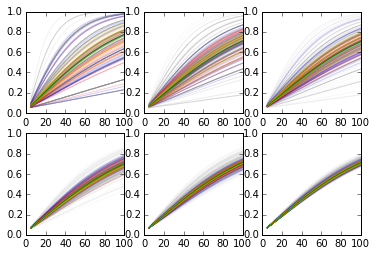

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
for idx, eff in enumerate(effs):
    ax = fig.add_subplot(2, 8, idx+1)
    for e in eff.flatten():
        if np.isnan(e):
            continue
        ax.plot(counts, ft.solve_power(e, counts, alpha=0.05, power=None), '-', color=[0.5, 0.5, 0.5], alpha=0.05)
    for idy in xrange(25):
        e = np.nanmean(np.random.choice(eff.flatten(), 3))
        if np.isnan(e):
            continue
        ax.plot(counts, ft.solve_power(e, counts, alpha=0.05, power=None), '-', color='b', alpha=0.2)
    for idy in xrange(25):
        e = np.nanmean(np.random.choice(eff.flatten(), 5))
        if np.isnan(e):
            continue
        ax.plot(counts, ft.solve_power(e, counts, alpha=0.05, power=None), '-', color='r', alpha=0.2)
        
    for idy in xrange(25):
        e = np.nanmean(np.random.choice(eff.flatten(), 10))
        if np.isnan(e):
            continue
        ax.plot(counts, ft.solve_power(e, counts, alpha=0.05, power=None), '-', color='y', alpha=0.2)
    ax.plot(counts, ft.solve_power(np.nanmean(eff), counts, alpha=0.05, power=None), '-', color='g')
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 1])
        

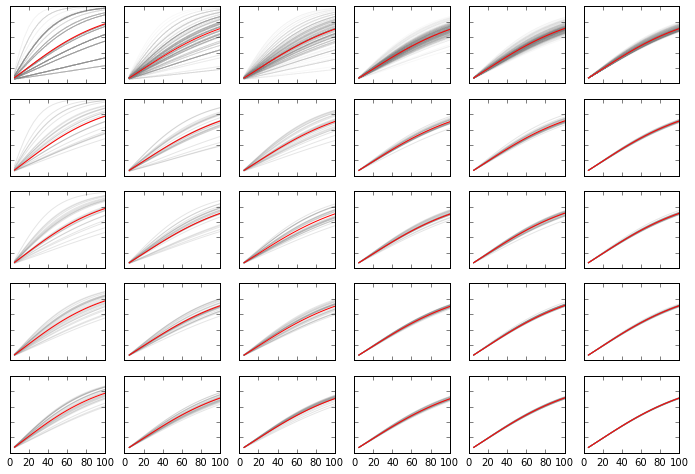

In [41]:
fig = plt.figure()
fig.set_size_inches((14, 8))
for idx, eff in enumerate(effs):
    ax1 = fig.add_subplot(5, 7, idx+1)
    ax2 = fig.add_subplot(5, 7, idx+7)
    ax3 = fig.add_subplot(5, 7, idx+13)
    ax4 = fig.add_subplot(5, 7, idx+19)
    ax5 = fig.add_subplot(5, 7, idx+25)
    
    ax1.plot(counts, ft.solve_power(np.nanmean(eff), counts, alpha=0.05, power=None), '-', color='r')
    ax2.plot(counts, ft.solve_power(np.nanmean(eff), counts, alpha=0.05, power=None), '-', color='r')
    ax3.plot(counts, ft.solve_power(np.nanmean(eff), counts, alpha=0.05, power=None), '-', color='r')
    ax4.plot(counts, ft.solve_power(np.nanmean(eff), counts, alpha=0.05, power=None), '-', color='r')
    ax5.plot(counts, ft.solve_power(np.nanmean(eff), counts, alpha=0.05, power=None), '-', color='r')
    
    for e in eff.flatten():
        if np.isnan(e):
            continue
        ax1.plot(counts, ft.solve_power(e, counts, alpha=0.05, power=None), '-', color=[0.5, 0.5, 0.5], alpha=0.05)
    for idy in xrange(25):
        e = np.nanmean(np.random.choice(eff.flatten(), 3))
        if np.isnan(e):
            continue
        ax2.plot(counts, ft.solve_power(e, counts, alpha=0.05, power=None), '-', color=[0.5, 0.5, 0.5], alpha=0.2)
    for idy in xrange(25):
        e = np.nanmean(np.random.choice(eff.flatten(), 5))
        if np.isnan(e):
            continue
        ax3.plot(counts, ft.solve_power(e, counts, alpha=0.05, power=None), '-', color=[0.5, 0.5, 0.5], alpha=0.2)
        
    for idy in xrange(25):
        e = np.nanmean(np.random.choice(eff.flatten(), 10))
        if np.isnan(e):
            continue
        ax4.plot(counts, ft.solve_power(e, counts, alpha=0.05, power=None), '-', color=[0.5, 0.5, 0.5], alpha=0.2)
        
    for idy in xrange(25):
        e = np.nanmean(np.random.choice(eff.flatten(), 25))
        if np.isnan(e):
            continue
        ax5.plot(counts, ft.solve_power(e, counts, alpha=0.05, power=None), '-', color=[0.5, 0.5, 0.5], alpha=0.2)

    ax1.set_xlim([0, 100])
    ax1.set_ylim([0, 1])
    ax1.set_xticklabels('')
    ax1.set_yticklabels('')
    ax2.set_xlim([0, 100])
    ax2.set_ylim([0, 1])
    ax2.set_xticklabels('')
    ax2.set_yticklabels('')
    ax3.set_xlim([0, 100])
    ax3.set_ylim([0, 1])
    ax3.set_xticklabels('')
    ax3.set_yticklabels('')
    ax4.set_xlim([0, 100])
    ax4.set_ylim([0, 1])
    ax4.set_xticklabels('')
    ax4.set_yticklabels('')
    ax5.set_xlim([0, 100])
    ax5.set_ylim([0, 1])
    ax5.set_yticklabels('')